<a href="https://colab.research.google.com/github/Lizeth058/BIT_BootcampIA/blob/main/Sales_Colombia_Regresion_OrIginal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive



from google.colab import drive # Conectandonos con google drive
drive.mount('/content/drive')

import os    # la librería necesaria para la ruta de la carpeta
os.chdir('//content/drive/MyDrive/Colab Notebooks/bootcamp IA/RETO2')


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Mostrar lista de archivos
os.listdir()

# Leer los archivos CSV
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Mostrar el DataFrame
df_train

# Verificar los tipos de datos en el DataFrame
print(df_train.dtypes)

# Qué tamaño tiene el data set?
df_train.shape

# Información del DataFrame
df_train.info()


index           int64
V1              int64
CORRELA_16     object
CORRE_9        object
IDOJ1         float64
               ...   
CTOINS        float64
VENTASNOP       int64
GASTOS        float64
GASTOSNOP     float64
GASTOPNOP     float64
Length: 65, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        7488 non-null   int64  
 1   V1           7488 non-null   int64  
 2   CORRELA_16   7488 non-null   object 
 3   CORRE_9      7488 non-null   object 
 4   IDOJ1        7483 non-null   float64
 5   IDAIO        7486 non-null   float64
 6   CIMREP       7488 non-null   float64
 7   BRUTA        7488 non-null   float64
 8   CONSUI       7488 non-null   float64
 9   GAS          7488 non-null   float64
 10  EMPAQUE      7488 non-null   float64
 11  HONORA       7488 non-null   float64
 12  COMISION     7488 non-null   flo

In [4]:
# Seleccionar las columnas de tipo 'object'
columnas_objeto = df_train.select_dtypes(include=['object']).columns

# Crear una lista para almacenar las columnas que no se pueden convertir
columnas_no_convertidas = []

# Intentar convertir cada columna a numérica
for col in columnas_objeto:
    try:
        df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    except:
        print(f"No se pudo convertir la columna {col} a numérica")
        columnas_no_convertidas.append(col)

# Imprimir las columnas que no se pudieron convertir y sus valores únicos no numéricos
for column in columnas_no_convertidas:
    unique_values = df_train[column].unique()
    non_numeric_values = [value for value in unique_values if not isinstance(value, (int, float, np.number))]
    if non_numeric_values:
        print(f"\nColumna '{column}': {non_numeric_values}")

# Rellenar valores nulos con la media de cada columna
df_train.fillna(df_train.mean(), inplace=True)


In [5]:
# Eliminar la columna 'VENTASNOP'
df_train = df_train.drop('VENTASNOP', axis=1)


In [6]:
# Separar datos de entrenamiento en features (X) y target (y)
X = df_train.drop('VENTA', axis=1)
y = df_train['VENTA']

# Crear y entrenar el modelo
model = RandomForestRegressor(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [7]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de la evaluación del modelo
print(f"Error Cuadratico Medio: {mse:.2f}")
print(f"Coeficiente de Determinación: {r2:.2f}")


Error Cuadratico Medio: 1249671216082184.50
Coeficiente de Determinación: 0.99


In [10]:
# Número de atributos y registros
num_atributos = len(df_train.columns)
num_registros = len(df_train)

print(f"Número de atributos: {num_atributos}")
print(f"Número de registros: {num_registros}")

Número de atributos: 62
Número de registros: 7488


In [11]:

# Eliminar columnas no numéricas
df_train = df_train.drop(['CORRELA_16', 'CORRE_9'], axis=1)


KeyError: "['CORRELA_16', 'CORRE_9'] not found in axis"

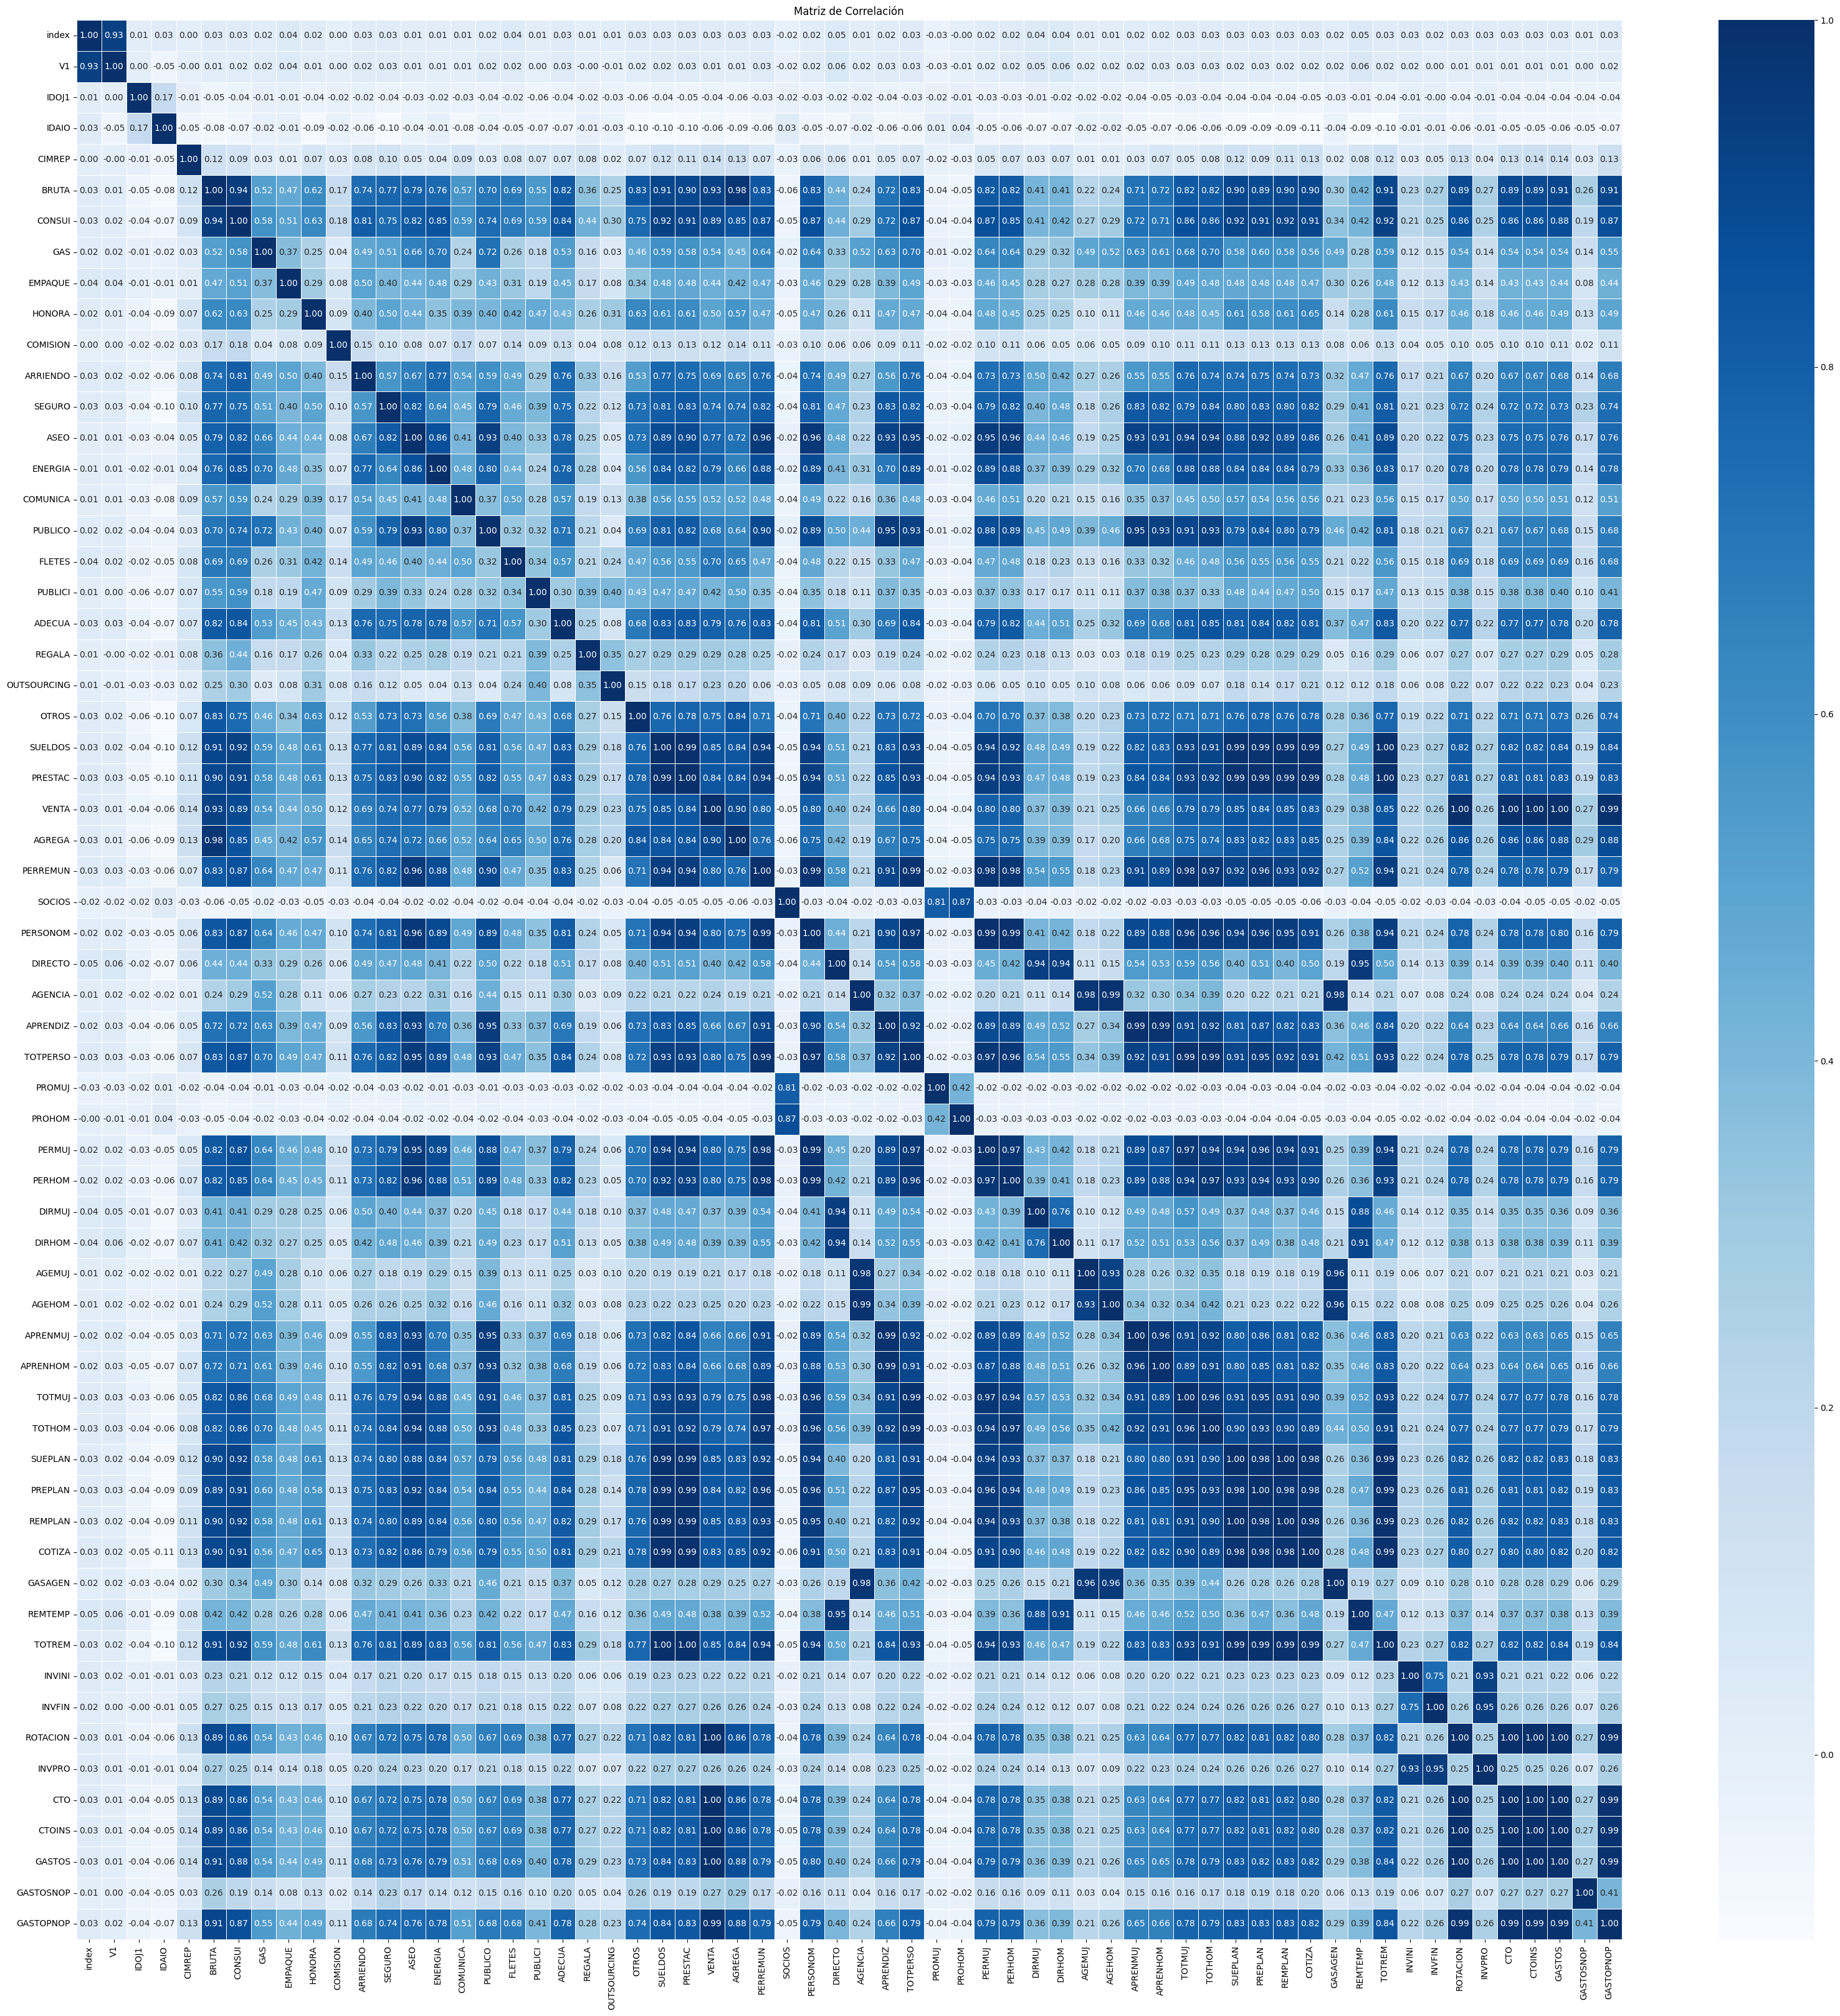

VENTA
0.000000e+00    221
2.003967e+07      3
4.546585e+09      3
1.097725e+09      3
7.045547e+08      3
               ... 
1.337766e+07      1
7.139742e+06      1
1.922274e+07      1
5.703056e+07      1
8.433555e+06      1
Name: count, Length: 7217, dtype: int64

In [12]:
# Calcular la matriz de correlación
correlation_matrix = df_train.corr()

# Crear un mapa de calor con Seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

df_train['VENTA'].value_counts()


In [13]:

# Encontrar las correlaciones más fuertes
threshold = 0.7  # Umbral para considerar una correlación fuerte
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Eliminar la diagonal (correlación de una variable consigo misma)
strong_correlations = strong_correlations.mask(np.equal(*np.indices(strong_correlations.shape)))

# Imprimir las correlaciones más fuertes
for col in strong_correlations:
    for row in strong_correlations.index:
        if not pd.isna(strong_correlations.loc[row, col]):
            print(f"Correlación fuerte entre {row} y {col}: {strong_correlations.loc[row, col]}")

# Identificar variables con alta correlación con la variable objetivo
target_correlations = correlation_matrix['VENTA'].abs().sort_values(ascending=False)
print("\nCorrelaciones con la variable objetivo:")
print(target_correlations)


Correlación fuerte entre V1 y index: 0.9333668020452837
Correlación fuerte entre index y V1: 0.9333668020452837
Correlación fuerte entre CONSUI y BRUTA: 0.9442588959666314
Correlación fuerte entre ARRIENDO y BRUTA: 0.7429089593555548
Correlación fuerte entre SEGURO y BRUTA: 0.7709900585259717
Correlación fuerte entre ASEO y BRUTA: 0.7906196451164624
Correlación fuerte entre ENERGIA y BRUTA: 0.7607644510886611
Correlación fuerte entre PUBLICO y BRUTA: 0.7048362526416075
Correlación fuerte entre ADECUA y BRUTA: 0.8210430114473828
Correlación fuerte entre OTROS y BRUTA: 0.834531314184715
Correlación fuerte entre SUELDOS y BRUTA: 0.905413752250573
Correlación fuerte entre PRESTAC y BRUTA: 0.9012583234730849
Correlación fuerte entre VENTA y BRUTA: 0.9273899410161787
Correlación fuerte entre AGREGA y BRUTA: 0.9764264921396277
Correlación fuerte entre PERREMUN y BRUTA: 0.8306805961618461
Correlación fuerte entre PERSONOM y BRUTA: 0.8279787953047811
Correlación fuerte entre APRENDIZ y BRUTA: 0

In [14]:
# Aplicar PCA
pca_97 = PCA(n_components=0.97)
X_pca_97 = pca_97.fit_transform(X_scaled)

# Entrenamiento y evaluación del modelo con PCA 97%
X_train_pca_97, X_test_pca_97, y_train, y_test = train_test_split(X_pca_97, y, test_size=0.2, random_state=42)
model_97 = RandomForestRegressor(random_state=42)
model_97.fit(X_train_pca_97, y_train)
y_pred_97 = model_97.predict(X_test_pca_97)
mse_97 = mean_squared_error(y_test, y_pred_97)
r2_97 = r2_score(y_test, y_pred_97)

print("--- Resultados del modelo con PCA 97% ---")
print(f"Error Cuadrático Medio: {mse_97:.2f}")
print(f"Coeficiente de Determinación: {r2_97:.2f}")


--- Resultados del modelo con PCA 97% ---
Error Cuadrático Medio: 13065998579221334.00
Coeficiente de Determinación: 0.92


In [15]:
# Aplicar PCA con un punto de corte de varianza del 99%
pca_99 = PCA(n_components=0.99)
X_pca_99 = pca_99.fit_transform(X_scaled)

# Entrenamiento y evaluación del modelo con PCA 99%
X_train_pca_99, X_test_pca_99, y_train, y_test = train_test_split(X_pca_99, y, test_size=0.2, random_state=42)
model_99 = RandomForestRegressor(random_state=42)
model_99.fit(X_train_pca_99, y_train)
y_pred_99 = model_99.predict(X_test_pca_99)
mse_99 = mean_squared_error(y_test, y_pred_99)
r2_99 = r2_score(y_test, y_pred_99)

print("--- Resultados del modelo con PCA 99% ---")
print(f"Error Cuadrático Medio: {mse_99:.2f}")
print(f"Coeficiente de Determinación: {r2_99:.2f}")


--- Resultados del modelo con PCA 99% ---
Error Cuadrático Medio: 17106565448377808.00
Coeficiente de Determinación: 0.89


In [19]:
# Importancia de las variables - después de PCA
importances = model_97.feature_importances_
features = [f'PC{i+1}' for i in range(len(importances))]
feature_importances = pd.DataFrame({"feature": features, "importance": importances}).sort_values("importance", ascending=False)
print("\nImportancia de las variables:")
print(feature_importances)



Importancia de las variables:
   feature  importance
0      PC1    0.673572
2      PC3    0.088621
1      PC2    0.042858
13    PC14    0.026602
16    PC17    0.024495
3      PC4    0.022964
23    PC24    0.016807
15    PC16    0.015420
7      PC8    0.013606
9     PC10    0.010096
5      PC6    0.009071
24    PC25    0.008484
12    PC13    0.006863
18    PC19    0.005455
11    PC12    0.005071
22    PC23    0.004350
4      PC5    0.004074
17    PC18    0.003897
20    PC21    0.003844
8      PC9    0.003789
14    PC15    0.002955
10    PC11    0.001953
6      PC7    0.001829
21    PC22    0.001754
19    PC20    0.001568


In [18]:
# Revisar la cantidad de valores nulos en cada columna
print(df_train.isnull().sum())

# Eliminar columnas con más del 50% de valores nulos
threshold = len(df_train) * 0.5
df_train.dropna(thresh=threshold, axis=1, inplace=True)

print(df_train.info())


index        0
V1           0
IDOJ1        0
IDAIO        0
CIMREP       0
            ..
CTO          0
CTOINS       0
GASTOS       0
GASTOSNOP    0
GASTOPNOP    0
Length: 62, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        7488 non-null   int64  
 1   V1           7488 non-null   int64  
 2   IDOJ1        7488 non-null   float64
 3   IDAIO        7488 non-null   float64
 4   CIMREP       7488 non-null   float64
 5   BRUTA        7488 non-null   float64
 6   CONSUI       7488 non-null   float64
 7   GAS          7488 non-null   float64
 8   EMPAQUE      7488 non-null   float64
 9   HONORA       7488 non-null   float64
 10  COMISION     7488 non-null   float64
 11  ARRIENDO     7488 non-null   float64
 12  SEGURO       7488 non-null   float64
 13  ASEO         7488 non-null   float64
 14  ENERGIA      7488 non-null

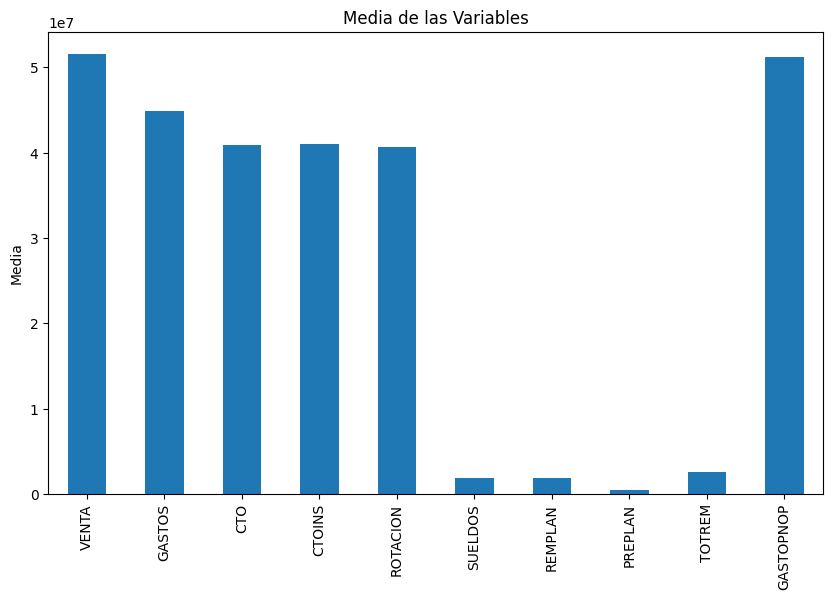

In [20]:
variables = ['VENTA', 'GASTOS', 'CTO', 'CTOINS', 'ROTACION', 'SUELDOS', 'REMPLAN', 'PREPLAN', 'TOTREM', 'GASTOPNOP']
plt.figure(figsize=(10, 6))
df_train[variables].mean().plot.bar()
plt.title('Media de las Variables')
plt.ylabel('Media')
plt.show()


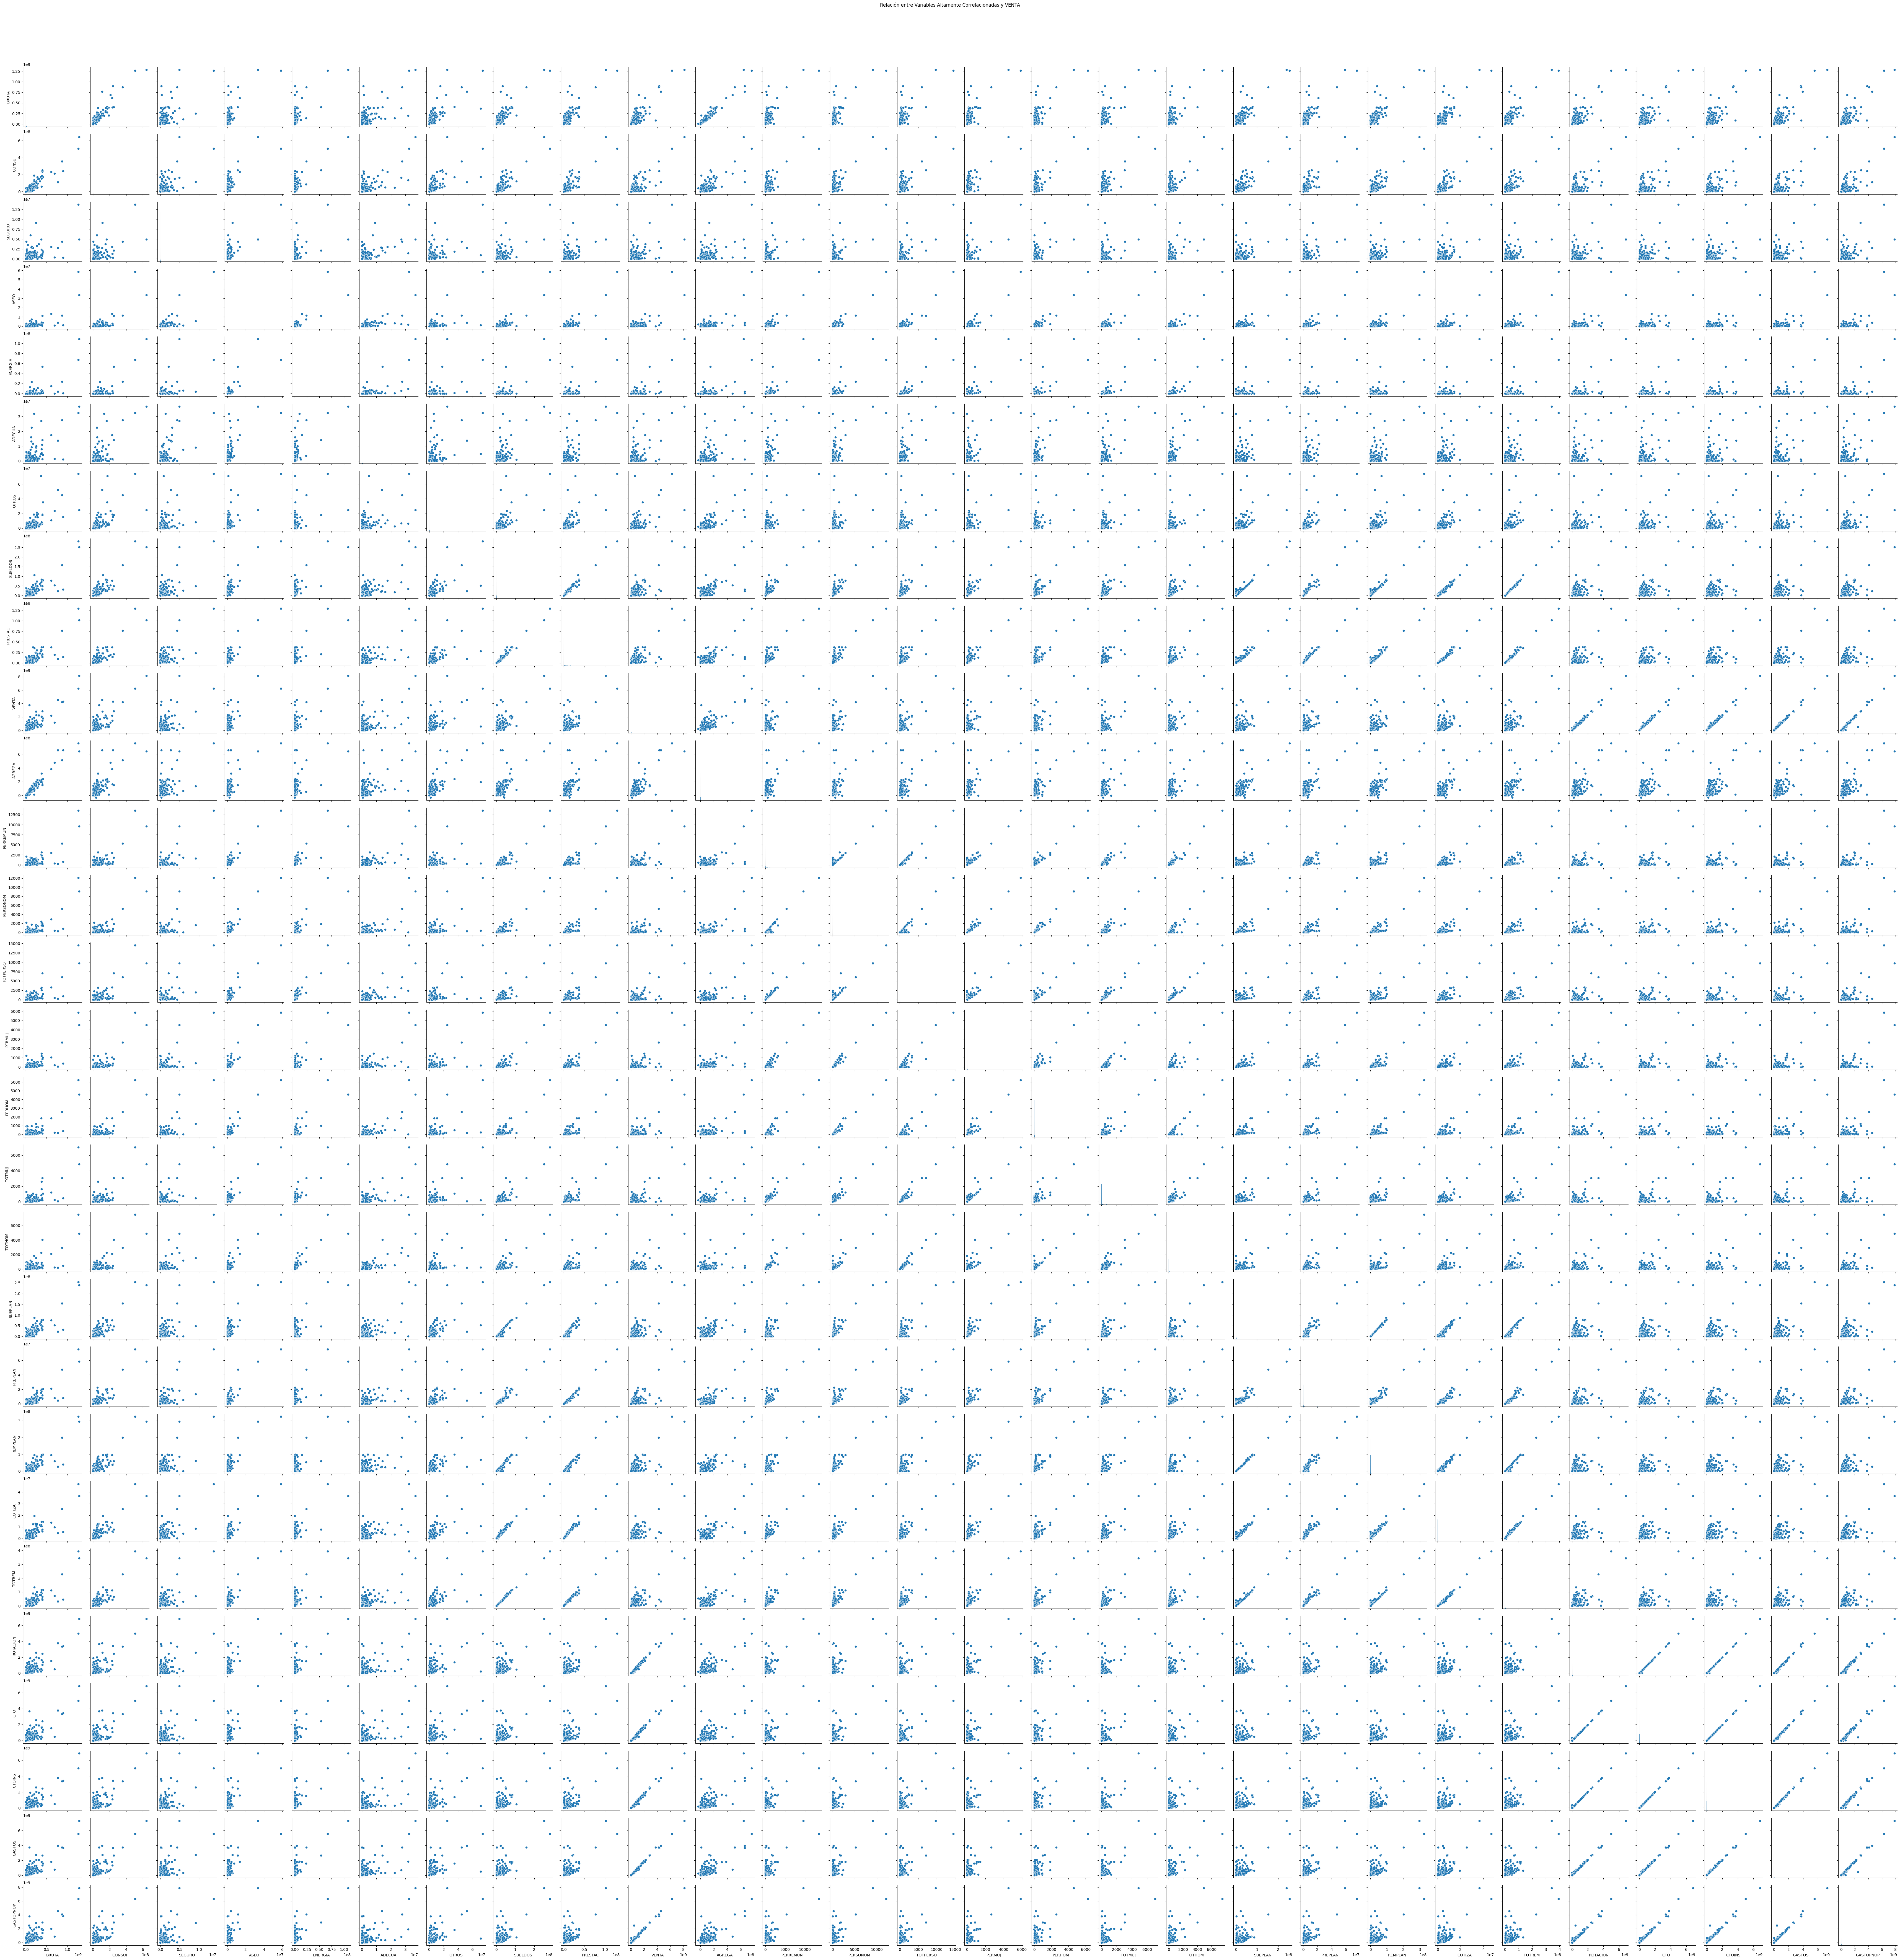

In [23]:
high_corr_vars = correlation_matrix['VENTA'][abs(correlation_matrix['VENTA']) > 0.7].index
sns.pairplot(df_train[high_corr_vars])
plt.suptitle('Relación entre Variables Altamente Correlacionadas y VENTA', y=1.02)
plt.show()


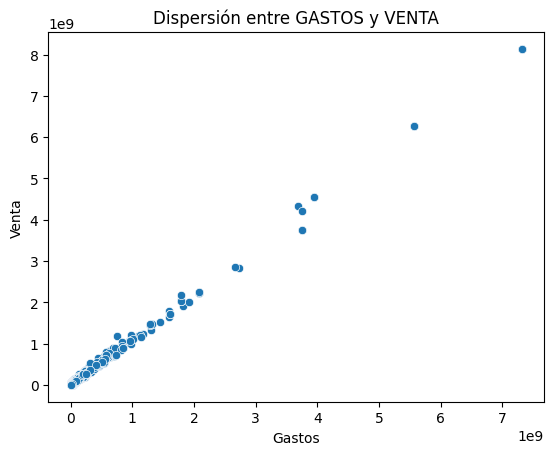

In [21]:
sns.scatterplot(x='GASTOS', y='VENTA', data=df_train)
plt.title('Dispersión entre GASTOS y VENTA')
plt.xlabel('Gastos')
plt.ylabel('Venta')
plt.show()


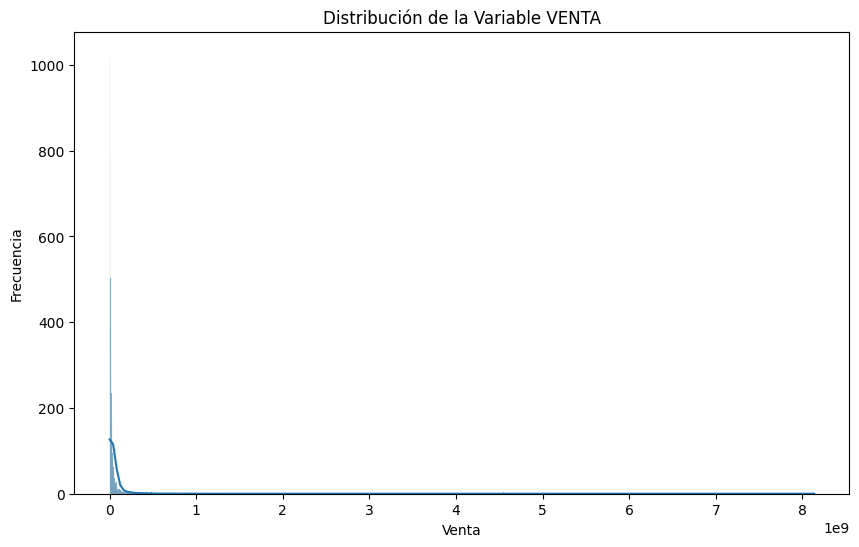

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['VENTA'], kde=True)
plt.title('Distribución de la Variable VENTA')
plt.xlabel('Venta')
plt.ylabel('Frecuencia')
plt.show()
